In [ ]:
# AUTHOR: Hindesh Akash
# # Email Spam Classification
# 
# This notebook demonstrates how to build a binary classifier to identify spam vs legitimate emails using:
# 1. Naive Bayes
# 2. Logistic Regression
# 
# We'll use the classic Spambase dataset from the UCI Machine Learning Repository.

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hindeshakash/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# %% [markdown]
# ## 1. Data Loading and Exploration

# %%
# Load the dataset (this example uses the Spambase dataset)
# Note: In practice, you might use raw email text data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Load feature names
feature_names = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names", 
                           skiprows=32, header=None, sep=":")[0].tolist()
feature_names = [name.split()[0] for name in feature_names]
feature_names.append('spam_label')  # Add the target column name

# Assign column names
data.columns = feature_names

# %%
# Display basic info
print(f"Dataset shape: {data.shape}")
data.head()

# %%
# Check class distribution
print("Class distribution:")
print(data['spam_label'].value_counts())
print("\nPercentage:")
print(data['spam_label'].value_counts(normalize=True) * 100)

Dataset shape: (4601, 58)
Class distribution:
spam_label
0    2788
1    1813
Name: count, dtype: int64

Percentage:
spam_label
0    60.595523
1    39.404477
Name: proportion, dtype: float64


In [3]:
# %% [markdown]
# ## 2. Data Preprocessing

# %%
# Split into features and target
X = data.drop('spam_label', axis=1)
y = data['spam_label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (3220, 57)
Test set size: (1381, 57)


In [4]:
# %% [markdown]
# ## 3. Model Building and Evaluation

# %%
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
    return model

Naive Bayes Performance:


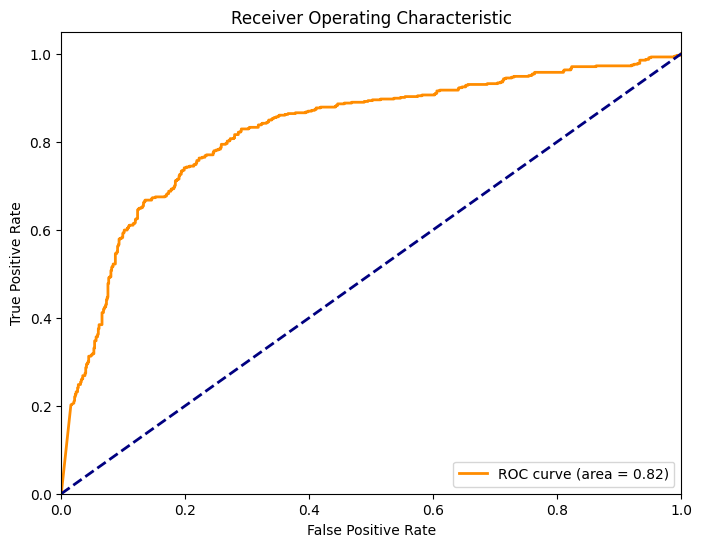

Accuracy: 0.7697

Confusion Matrix:
[[692 145]
 [173 371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       837
           1       0.72      0.68      0.70       544

    accuracy                           0.77      1381
   macro avg       0.76      0.75      0.76      1381
weighted avg       0.77      0.77      0.77      1381



In [5]:
# %% [markdown]
# ### 3.1 Naive Bayes Classifier

# %%
# Initialize and evaluate Naive Bayes
nb_model = MultinomialNB()
print("Naive Bayes Performance:")
nb_model = evaluate_model(nb_model, X_train, y_train, X_test, y_test)

Logistic Regression Performance:


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


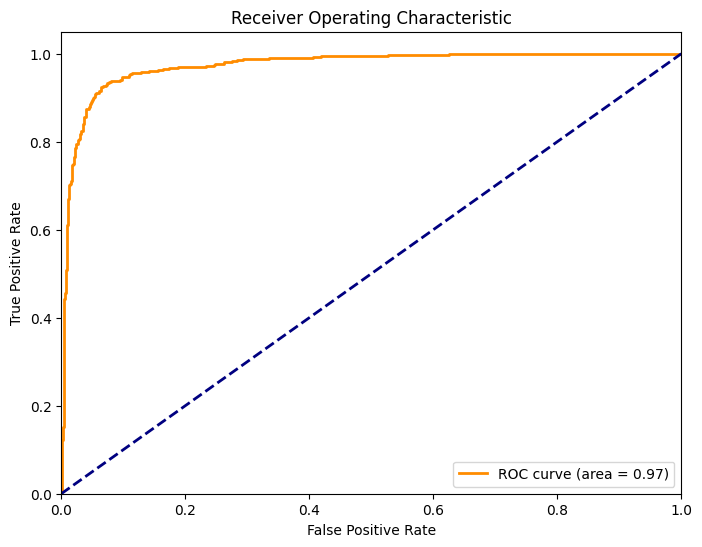

Accuracy: 0.9283

Confusion Matrix:
[[793  44]
 [ 55 489]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [6]:
# %% [markdown]
# ### 3.2 Logistic Regression Classifier

# %%
# Initialize and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
print("Logistic Regression Performance:")
lr_model = evaluate_model(lr_model, X_train, y_train, X_test, y_test)


Naive Bayes on Raw Text Data:


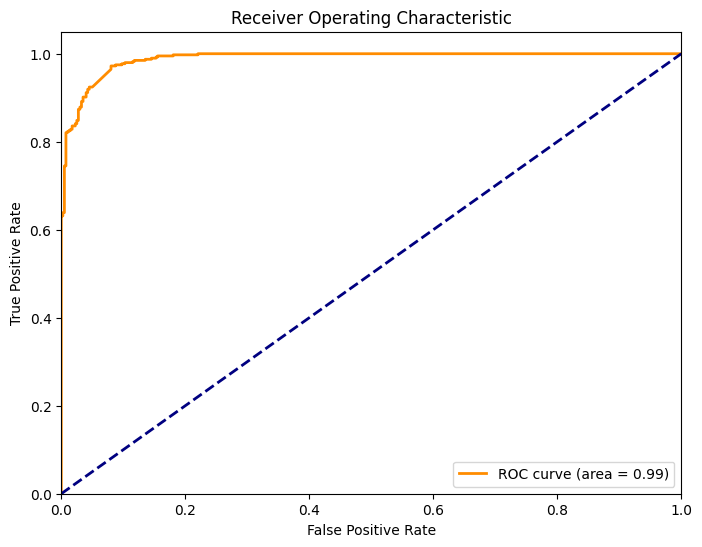

Accuracy: 0.9371

Confusion Matrix:
[[379  20]
 [ 30 366]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       399
           1       0.95      0.92      0.94       396

    accuracy                           0.94       795
   macro avg       0.94      0.94      0.94       795
weighted avg       0.94      0.94      0.94       795

Logistic Regression on Raw Text Data:


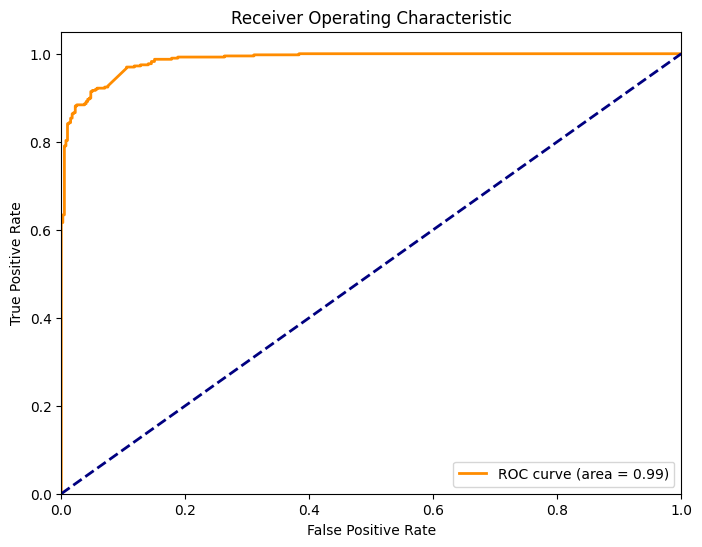

Accuracy: 0.9333

Confusion Matrix:
[[379  20]
 [ 33 363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       399
           1       0.95      0.92      0.93       396

    accuracy                           0.93       795
   macro avg       0.93      0.93      0.93       795
weighted avg       0.93      0.93      0.93       795



In [7]:
# %% [markdown]
# ## 4. Working with Raw Email Text (Alternative Approach)
# 
# The above uses pre-extracted features. Below shows how to work with raw email text.

# %%
# Example with raw email text (using a smaller dataset for demonstration)
from sklearn.datasets import fetch_20newsgroups

# Load a subset of the 20 Newsgroups dataset for demonstration
categories = ['rec.sport.hockey', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert to DataFrame
train_df = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})
test_df = pd.DataFrame({'text': newsgroups_test.data, 'target': newsgroups_test.target})

# For this demo, let's treat sci.med as "spam" (1) and hockey as "ham" (0)
train_df['spam'] = train_df['target'].apply(lambda x: 1 if x == 1 else 0)
test_df['spam'] = test_df['target'].apply(lambda x: 1 if x == 1 else 0)

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

# Apply preprocessing
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=1000)
X_train_text = vectorizer.fit_transform(train_df['processed_text'])
X_test_text = vectorizer.transform(test_df['processed_text'])
y_train_text = train_df['spam']
y_test_text = test_df['spam']

# %%
# Train and evaluate Naive Bayes on text data
print("Naive Bayes on Raw Text Data:")
nb_text_model = MultinomialNB()
nb_text_model = evaluate_model(nb_text_model, X_train_text, y_train_text, X_test_text, y_test_text)

# %%
# Train and evaluate Logistic Regression on text data
print("Logistic Regression on Raw Text Data:")
lr_text_model = LogisticRegression(max_iter=1000, random_state=42)
lr_text_model = evaluate_model(lr_text_model, X_train_text, y_train_text, X_test_text, y_test_text)


In [8]:
# %% [markdown]
# ## 5. Making Predictions on New Emails

# %%
# Example function to predict new emails
def predict_spam(email_text, model, vectorizer=None):
    if vectorizer:
        # For text models that need vectorization
        processed_text = preprocess_text(email_text)
        features = vectorizer.transform([processed_text])
    else:
        # For the Spambase dataset model
        # In practice, you'd need to extract all the same features as the original dataset
        # This is simplified for demonstration
        features = np.zeros((1, X_train.shape[1]))  # Placeholder
    
    prob = model.predict_proba(features)[0, 1]
    prediction = model.predict(features)[0]
    
    if prediction == 1:
        print(f"This email is classified as SPAM with {prob*100:.2f}% probability")
    else:
        print(f"This email is classified as HAM with {(1-prob)*100:.2f}% probability")


In [9]:
# %%
# Test with sample emails
sample_ham = "Hi there, just checking in to see if you're available for lunch next week."
sample_spam = "WIN A FREE IPHONE! Click here to claim your prize now limited time offer!!!"

print("Naive Bayes Prediction:")
predict_spam(sample_spam, nb_text_model, vectorizer)

print("\nLogistic Regression Prediction:")
predict_spam(sample_spam, lr_text_model, vectorizer)

Naive Bayes Prediction:
This email is classified as HAM with 51.12% probability

Logistic Regression Prediction:
This email is classified as HAM with 53.97% probability
